# LETR Basic Usage Demo

In [4]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import torchvision.transforms.functional as functional
import torch.nn.functional as F
from models import build_model
from util.misc import nested_tensor_from_tensor_list

c:\Users\MarcoPC\miniconda3\envs\deepl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image):
        for t in self.transforms:
            image = t(image)
        return image

    def __repr__(self):
        format_string = self.__class__.__name__ + "("
        for t in self.transforms:
            format_string += "\n"
            format_string += "    {0}".format(t)
        format_string += "\n)"
        return format_string

class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, image):
        image = functional.normalize(image, mean=self.mean, std=self.std)
        return image

class ToTensor(object):
    def __call__(self, img):
        return functional.to_tensor(img)

def resize(image, size, max_size=None):
    # size can be min_size (scalar) or (w, h) tuple
    def get_size_with_aspect_ratio(image_size, size, max_size=None):
        w, h = image_size
        if max_size is not None:
            min_original_size = float(min((w, h)))
            max_original_size = float(max((w, h)))
            if max_original_size / min_original_size * size > max_size:
                size = int(round(max_size * min_original_size / max_original_size))
        if (w <= h and w == size) or (h <= w and h == size):
            return (h, w)
        if w < h:
            ow = size
            oh = int(size * h / w)
        else:
            oh = size
            ow = int(size * w / h)
        return (oh, ow)

    def get_size(image_size, size, max_size=None):
        if isinstance(size, (list, tuple)):
            return size[::-1]
        else:
            return get_size_with_aspect_ratio(image_size, size, max_size)

    size = get_size(image.size, size, max_size)
    rescaled_image = functional.resize(image, size)

    return rescaled_image

class Resize(object):
    def __init__(self, sizes, max_size=None):
        assert isinstance(sizes, (list, tuple))
        self.sizes = sizes
        self.max_size = max_size

    def __call__(self, img):
        size = self.sizes
        return resize(img, size, self.max_size)



## Load Model Pre-trained Weights

In [13]:
# obtain checkpoints
checkpoint = torch.load('../exp/res50_stage1_848/checkpoints/checkpoint.pth', map_location='cpu')

# load model
args = checkpoint['args']
model, _, postprocessors = build_model(args)
model.load_state_dict(checkpoint['model'])
model.eval()



c:\Users\MarcoPC\miniconda3\envs\deepl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_f

## Load Demo Image

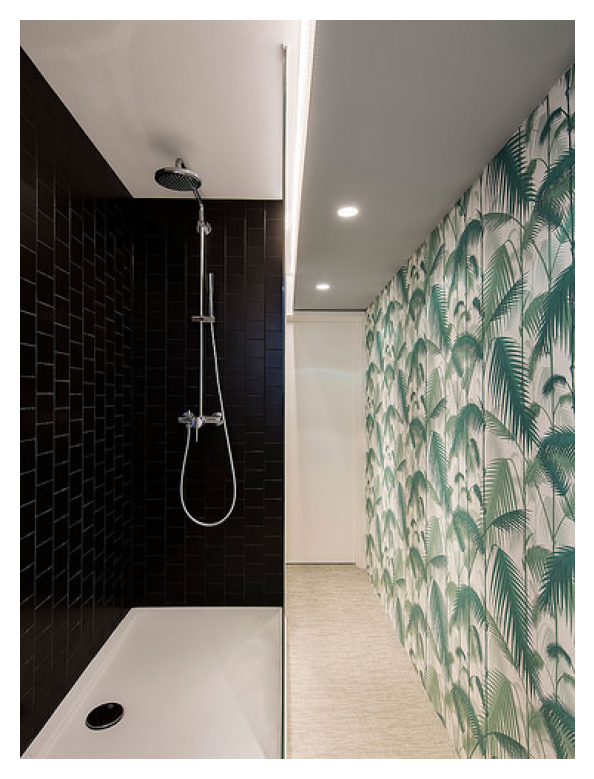

In [14]:
# load image
raw_img = plt.imread('../figures/demo.png')
h, w = raw_img.shape[0], raw_img.shape[1]
orig_size = torch.as_tensor([int(h), int(w)])

# normalize image
test_size = 1100
normalize = Compose([
        ToTensor(),
        Normalize([0.538, 0.494, 0.453], [0.257, 0.263, 0.273]),
        Resize([test_size]),
    ])
img = normalize(raw_img)
inputs = nested_tensor_from_tensor_list([img])
plt.axis('off')
plt.imshow(raw_img)

## Model Inference

In [16]:

outputs = model(inputs)

## Post-processing Results

In [82]:
outputs['pred_lines'].shape
for x in outputs['pred_logits'][0]:
    if(x[0] > x[1]):
        #print(x)
        break
a, b = prob[..., 0].max(-1)
a.shape

torch.Size([1])

In [102]:
text = labels == 2
lines[text.]

tensor([[ True,  True, False,  True, False, False,  True,  True,  True, False,
         False,  True, False, False,  True, False, False, False, False, False,
         False, False, False,  True,  True, False,  True,  True, False,  True,
         False,  True, False,  True,  True,  True,  True,  True, False,  True,
          True, False,  True, False,  True, False,  True,  True,  True,  True,
          True, False,  True,  True, False,  True,  True, False, False,  True,
          True,  True, False,  True,  True,  True, False,  True, False,  True,
          True,  True,  True,  True,  True,  True,  True,  True, False, False,
         False,  True,  True, False,  True, False,  True, False,  True, False,
         False, False,  True,  True,  True, False,  True,  True,  True,  True,
          True,  True, False, False,  True, False,  True, False, False,  True,
          True, False,  True,  True,  True, False, False, False,  True, False,
         False,  True, False,  True,  True, False,  

In [108]:
out_logits, out_line = outputs['pred_logits'], outputs['pred_lines']
prob = F.softmax(out_logits, -1)
#scores, labels = prob[..., :-1].max(-1)
scores, labels = prob[..., :].max(-1)
img_h, img_w = orig_size.unbind(0)
scale_fct = torch.unsqueeze(torch.stack([img_w, img_h, img_w, img_h], dim=0), dim=0)
lines = out_line * scale_fct[:, None, :]
lines = lines.view(1000, 2, 2)
lines = lines.flip([-1])# this is yxyx format
scores = scores.detach().numpy()
keep = scores >= 0.7
keep_labels_struct = labels == 1
keep_labels_text = labels == 2
keep_labels_text = keep_labels_text.squeeze()
keep_labels_struct = keep_labels_struct.squeeze()
keep = keep.squeeze()
lines = lines[keep]
lines = lines.reshape(lines.shape[0], -1)



In [109]:
for entry in prob:
    i = torch.argmax(entry)
    if(i == 0):
        print(entry)
        break
    
        


## Plot Inference Results

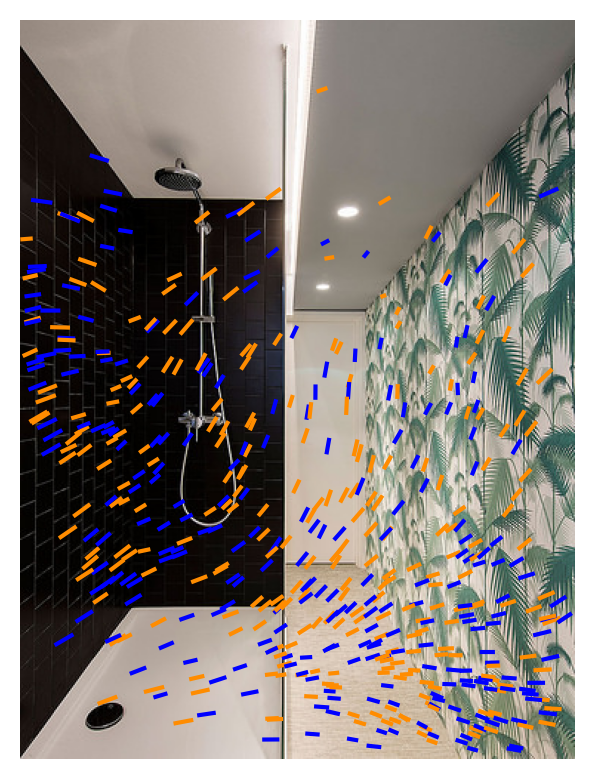

In [110]:

fig = plt.figure()
plt.imshow(raw_img)
for tp_id, line in enumerate(lines_text):
    y1, x1, y2, x2 = line # this is yxyx
    p1 = (x1.detach().numpy(), y1.detach().numpy())
    p2 = (x2.detach().numpy(), y2.detach().numpy())
    temp_color = 'darkorange' if keep_labels_text[tp_id] else 'blue'
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=1.5, color=temp_color, zorder=1)

for tp_id, line in enumerate(lines_struct):
    y1, x1, y2, x2 = line # this is yxyx
    p1 = (x1.detach().numpy(), y1.detach().numpy())
    p2 = (x2.detach().numpy(), y2.detach().numpy())
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=1.5, color='blue', zorder=1)
plt.axis('off')



#plt.savefig("../figures/demo_result.png", dpi=300, bbox_inches='tight', pad_inches = 0)
#plt.close(fig)
plt.show()


In [38]:
plt.show()